In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv('/content/Entertainer - dataset.csv')
df


,Entertainer,Year of Last Major Work (arguable),Year of Death,Gender (traditional),Birth Year,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy
0,Adele,2016,2020,F,1988,2008,19,2009
1,Angelina Jolie,2016,2022,F,1975,1999,"Girl, Interrupted",1999
2,Aretha Franklin,2014,1998,F,1942,1967,I Never Loved a Man (The Way I Love You),1968
3,Bette Davis,1989,1989,F,1908,1934,Of Human Bondage,1935
4,Betty White,2016,2026,F,1922,1952,Life with Elilzabeth,1976
...,...,...,...,...,...,...,...,...
65,Tom Hanks,2016,2002,M,1956,1984,Splash,1993
66,Tony Bennett,2016,1990,M,1926,1951,Because of You,1963
67,Wayne Newton,2016,1998,M,1942,1972,"Daddy, Don't You Walk So Fast",1982
68,Will Smith,2016,2019,M,1968,1990,The Fresh Prince of Bel-Air,1988


In [35]:
# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

Entertainer                                     0
Year of Last Major Work (arguable)              0
Year of Death                                   0
Gender (traditional)                            0
Birth Year                                      0
Year of Breakthrough/#1 Hit/Award Nomination    0
Breakthrough Name                               0
Year of First Oscar/Grammy/Emmy                 0
dtype: int64
       Year of Last Major Work (arguable)  Year of Death   Birth Year  \
count                           70.000000      70.000000    70.000000   
mean                          1998.971429    1997.614286  1935.585714   
std                             22.874561      18.675174    24.135783   
min                           1933.000000    1942.000000  1889.000000   
25%                           1980.000000    1989.250000  1916.000000   
50%                           2014.000000    1999.000000  1935.500000   
75%                           2016.000000    2013.000000  1954.000000   
max

In [36]:
# Drop rows with missing values
df.dropna(inplace=True)

# Convert columns to appropriate data types if needed
df['Year of Death'] = pd.to_datetime(df['Year of Death'], format='%Y')
df['Birth Year'] = pd.to_datetime(df['Birth Year'], format='%Y')
df

,Entertainer,Year of Last Major Work (arguable),Year of Death,Gender (traditional),Birth Year,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy
0,Adele,2016,2020-01-01,F,1988-01-01,2008,19,2009
1,Angelina Jolie,2016,2022-01-01,F,1975-01-01,1999,"Girl, Interrupted",1999
2,Aretha Franklin,2014,1998-01-01,F,1942-01-01,1967,I Never Loved a Man (The Way I Love You),1968
3,Bette Davis,1989,1989-01-01,F,1908-01-01,1934,Of Human Bondage,1935
4,Betty White,2016,2026-01-01,F,1922-01-01,1952,Life with Elilzabeth,1976
...,...,...,...,...,...,...,...,...
65,Tom Hanks,2016,2002-01-01,M,1956-01-01,1984,Splash,1993
66,Tony Bennett,2016,1990-01-01,M,1926-01-01,1951,Because of You,1963
67,Wayne Newton,2016,1998-01-01,M,1942-01-01,1972,"Daddy, Don't You Walk So Fast",1982
68,Will Smith,2016,2019-01-01,M,1968-01-01,1990,The Fresh Prince of Bel-Air,1988


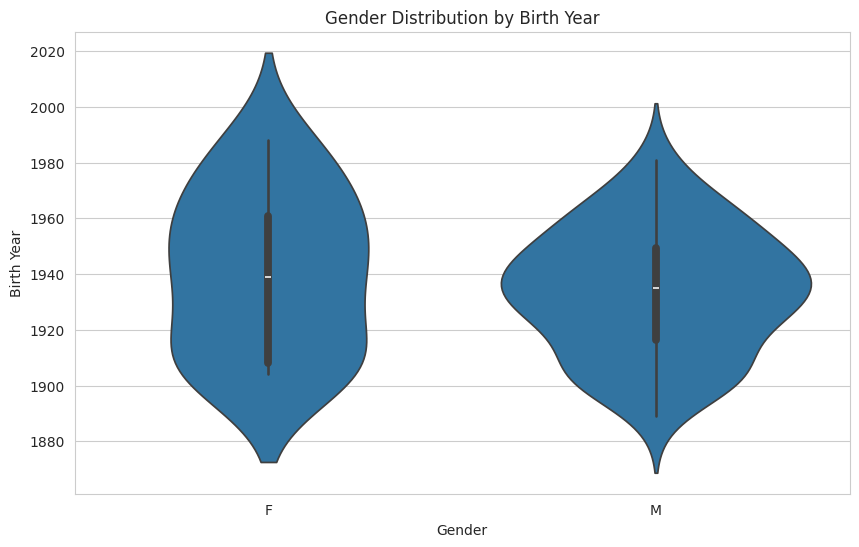

In [37]:

# Violin plot for gender distribution
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender (traditional)', y='Birth Year', data=df)
plt.title('Gender Distribution by Birth Year')
plt.xlabel('Gender')
plt.ylabel('Birth Year')
plt.show()


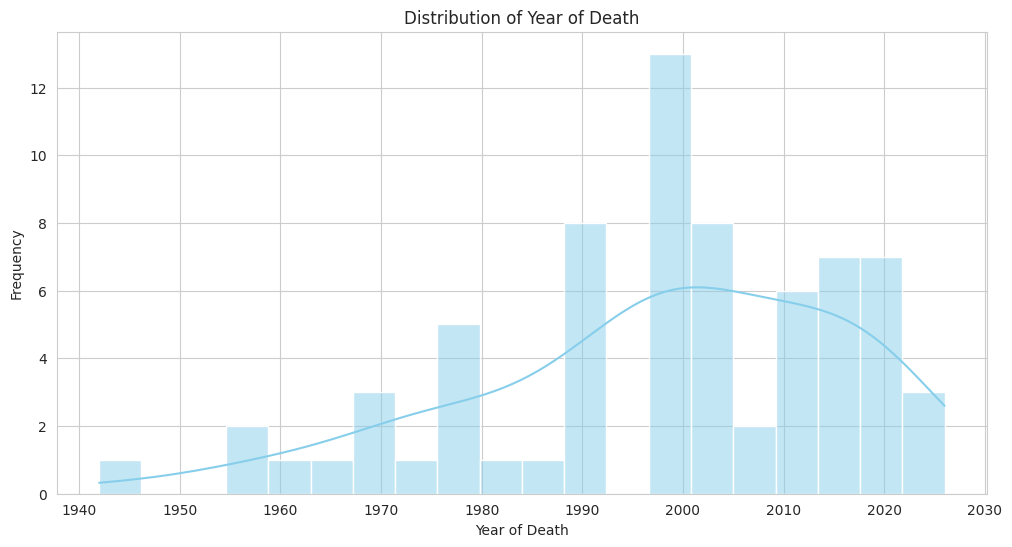

In [39]:
# Bar chart for year of death distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Year of Death'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Year of Death')
plt.xlabel('Year of Death')
plt.ylabel('Frequency')
plt.show()


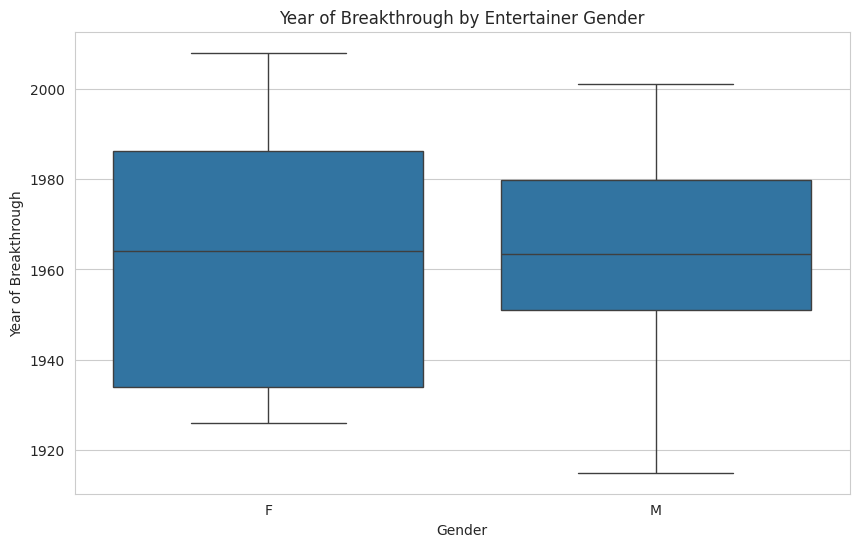

In [40]:
# Bar chart for Year of Breakthrough vs. Entertainer Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender (traditional)', y='Year of Breakthrough/#1 Hit/Award Nomination', data=df)
plt.title('Year of Breakthrough by Entertainer Gender')
plt.xlabel('Gender')
plt.ylabel('Year of Breakthrough')
plt.show()


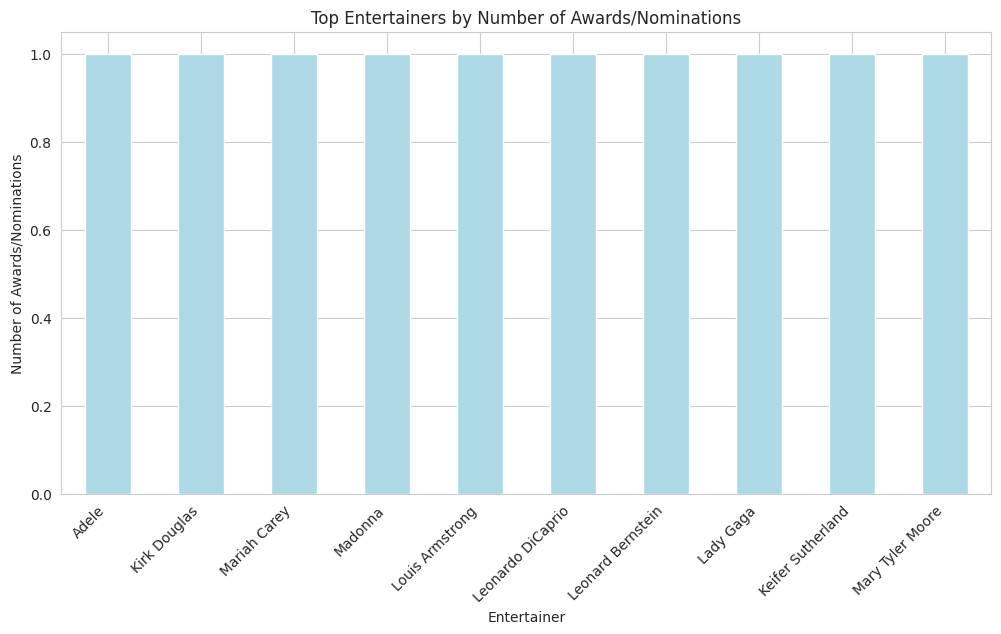

In [41]:
# Top Entertainers by Number of Awards/Nominations
top_entertainers = df.groupby('Entertainer')['Year of Breakthrough/#1 Hit/Award Nomination'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_entertainers.plot(kind='bar', color='lightblue')
plt.title('Top Entertainers by Number of Awards/Nominations')
plt.xlabel('Entertainer')
plt.ylabel('Number of Awards/Nominations')
plt.xticks(rotation=45, ha='right')
plt.show()


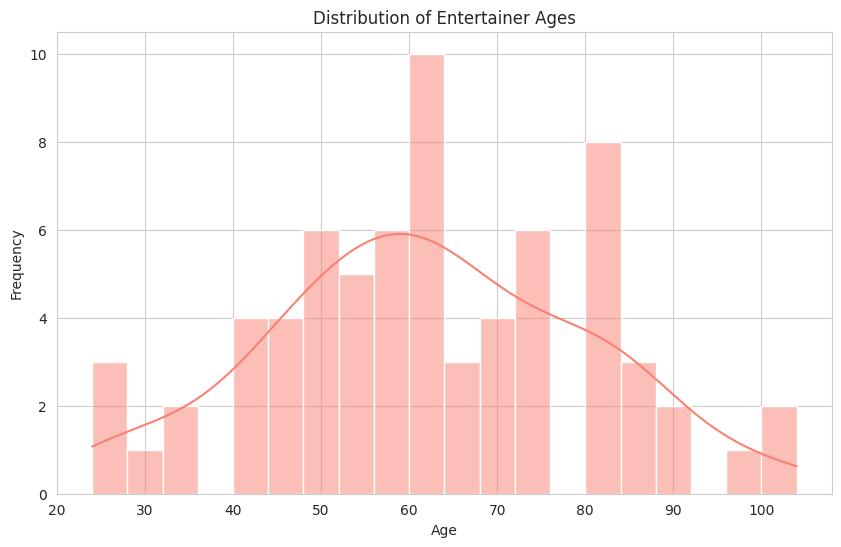

In [42]:
# Entertainer Age Distribution
df['Age'] = df['Year of Death'].dt.year - df['Birth Year'].dt.year
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Entertainer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


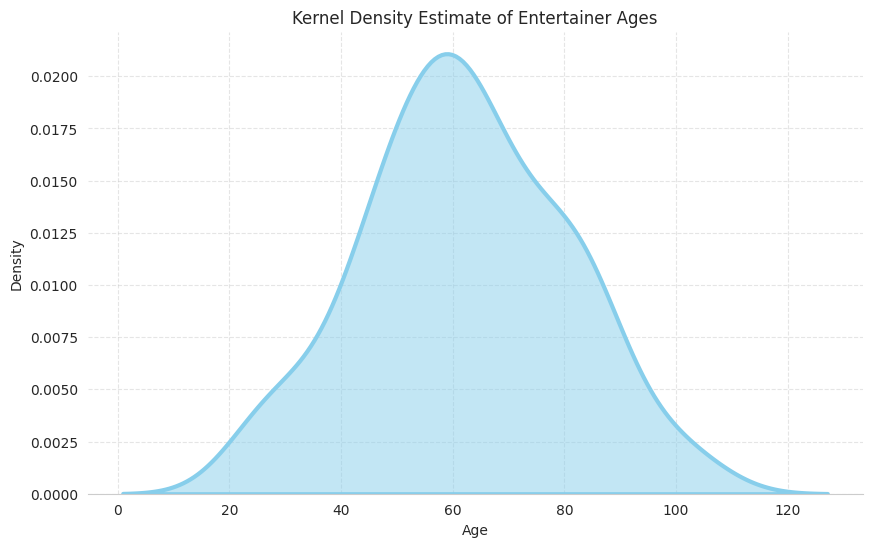

In [43]:
# KDE plot with customized styling
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Age'], color='skyblue', linewidth=3, fill=True, alpha=0.5)
plt.title('Kernel Density Estimate of Entertainer Ages')
plt.xlabel('Age')
plt.ylabel('Density')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Beautify the plot
sns.set_style("whitegrid")
sns.despine(left=True)

plt.show()


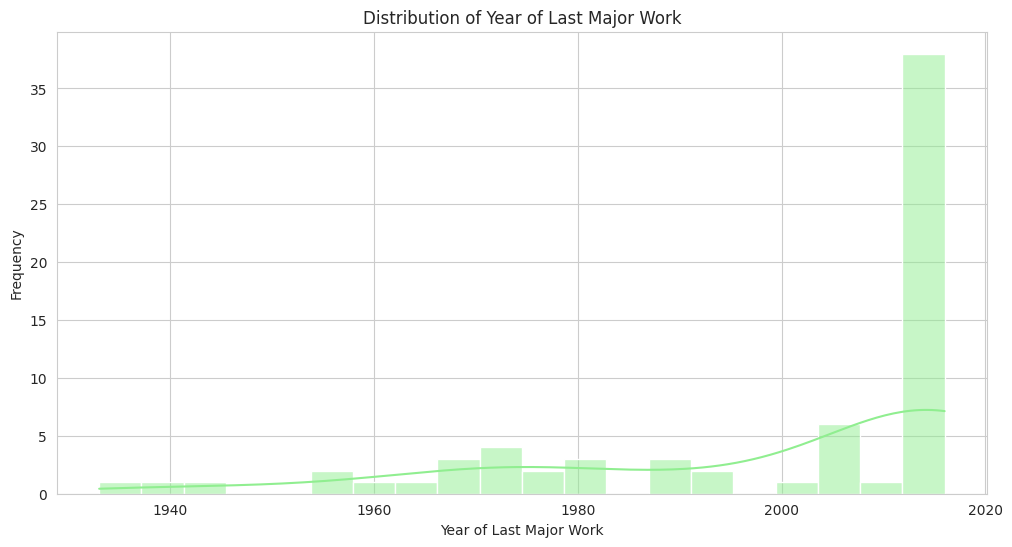

In [44]:
# Bar chart for Year of Last Major Work Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Year of Last Major Work (arguable)'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Year of Last Major Work')
plt.xlabel('Year of Last Major Work')
plt.ylabel('Frequency')
plt.show()


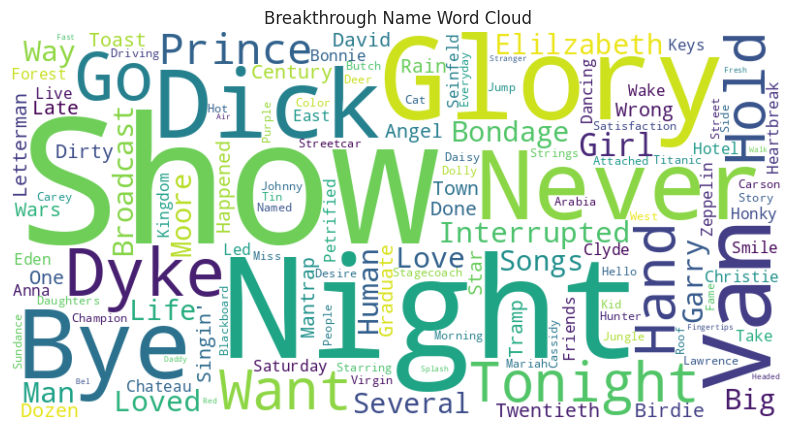

In [45]:

#  word cloud for Breakthrough Name
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Breakthrough Name'].dropna()))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Breakthrough Name Word Cloud')
plt.axis('off')
plt.show()


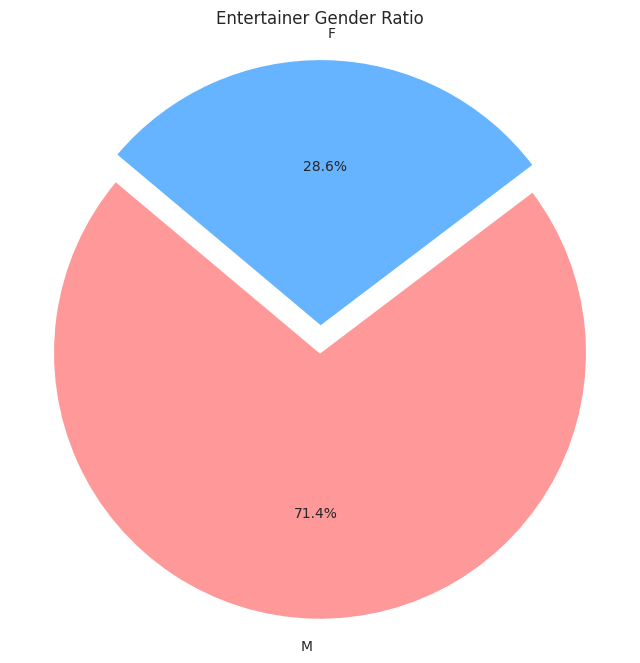

In [47]:
# Custom colors for pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Explode to emphasize certain segments
explode = (0.1, 0)  # Assuming you have two gender categories (male and female)

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Entertainer Gender Ratio')
plt.axis('equal')
plt.show()


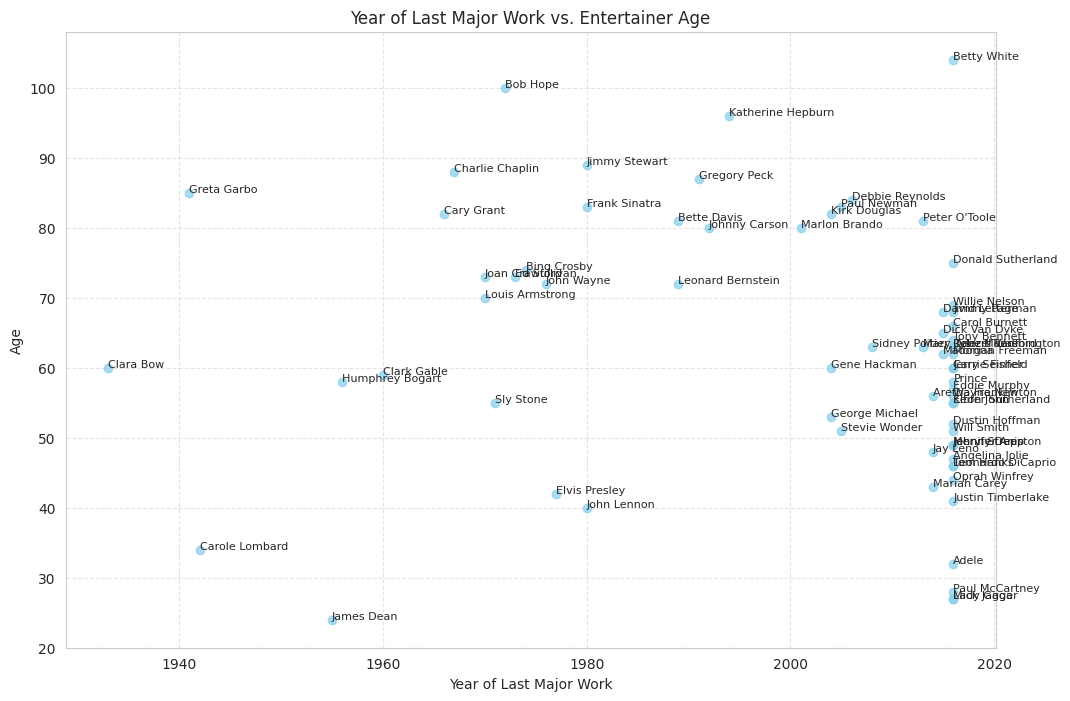

In [49]:
# Drop rows with missing values in relevant columns
df_filtered = df.dropna(subset=['Year of Last Major Work (arguable)', 'Age'])

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(df_filtered['Year of Last Major Work (arguable)'], df_filtered['Age'], color='skyblue', alpha=0.7)

# Annotate each point with entertainer name
for i, name in enumerate(df_filtered['Entertainer']):
    plt.text(df_filtered['Year of Last Major Work (arguable)'].iloc[i], df_filtered['Age'].iloc[i], name, fontsize=8)

plt.title('Year of Last Major Work vs. Entertainer Age')
plt.xlabel('Year of Last Major Work')
plt.ylabel('Age')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
